In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
municipios_am = {
    "alvaraes": 1300029,
    "amatura": 1300060,
    "anama": 1300086,
    "anori": 1300102,
    "apui": 1300144,
    "atalaia_do_norte": 1300201,
    "autazes": 1300300,
    "barcelos": 1300409,
    "barreirinha": 1300508,
    "benjamin_constant": 1300607,
    "beruri": 1300631,
    "boa_vista_do_ramos": 1300680,
    "boca_do_acre": 1300706,
    "borba": 1300805,
    "caapiranga": 1300839,
    "canutama": 1300904,
    "carauari": 1301001,
    "careiro": 1301100,
    "careiro_da_varzea": 1301159,
    "coari": 1301209,
    "codajas": 1301308,
    "eirunepe": 1301407,
    "envira": 1301506,
    "fonte_boa": 1301605,
    "guajara": 1301654,
    "humaita": 1301704,
    "ipixuna": 1301803,
    "iranduba": 1301852,
    "itacoatiara": 1301902,
    "itamarati": 1301951,
    "itapiranga": 1302009,
    "japura": 1302108,
    "jurua": 1302207,
    "jutai": 1302306,
    "labrea": 1302405,
    "manacapuru": 1302504,
    "manaquiri": 1302553,
    "manaus": 1302603,
    "manicore": 1302702,
    "maraa": 1302801,
    "maues": 1302900,
    "nhamunda": 1303007,
    "nova_olinda_do_norte": 1303106,
    "novo_airao": 1303205,
    "novo_aripuana": 1303304,
    "parintins": 1303403,
    "pauini": 1303502,
    "presidente_figueiredo": 1303536,
    "rio_preto_da_eva": 1303569,
    "santa_isabel_do_rio_negro": 1303601,
    "santo_antonio_do_ica": 1303700,
    "sao_gabriel_da_cachoeira": 1303809,
    "sao_paulo_de_olivenca": 1303908,
    "sao_sebastiao_do_uatuma": 1303957,
    "silves": 1304005,
    "tabatinga": 1304062,
    "tapaua": 1304104,
    "tefe": 1304203,
    "tonantins": 1304237,
    "uarini": 1304260,
    "urucara": 1304302,
    "urucurituba": 1304401
}

In [3]:
dicionario_cidades = municipios_am

url_base = 'https://info.dengue.mat.br/api/alertcity'

pasta_dados = 'dados_cidades'
if not os.path.exists(pasta_dados):
    os.makedirs(pasta_dados)

print("Iniciando download dos dados das cidades...")
print("-" * 50)

for cidade, geocode in dicionario_cidades.items():
    try:
        print(f"Carregando dados de {cidade.replace('_', ' ').title()}...")

        search_filter = (
            f'geocode={geocode}&disease=dengue&format=csv&' +
            'ew_start=1&ew_end=70&ey_start=2010&ey_end=2025'
        )

        url_completa = f'{url_base}?{search_filter}'

        df = pd.read_csv(url_completa)

        nome_arquivo = f'{pasta_dados}/{cidade}.csv'
        df.to_csv(nome_arquivo, index=False)

        print(f"---> {cidade}: {len(df)} registros salvos")
        print(f"\tArquivo CSV: {nome_arquivo}")

    except Exception as e:
        print(f" Erro ao carregar dados de {cidade}: {str(e)}")

    print("-" * 30)

print(f"\nOperação concluída")

Iniciando download dos dados das cidades...
--------------------------------------------------
Carregando dados de Alvaraes...
---> alvaraes: 830 registros salvos
	Arquivo CSV: dados_cidades/alvaraes.csv
------------------------------
Carregando dados de Amatura...
---> amatura: 830 registros salvos
	Arquivo CSV: dados_cidades/amatura.csv
------------------------------
Carregando dados de Anama...
---> anama: 830 registros salvos
	Arquivo CSV: dados_cidades/anama.csv
------------------------------
Carregando dados de Anori...
---> anori: 830 registros salvos
	Arquivo CSV: dados_cidades/anori.csv
------------------------------
Carregando dados de Apui...
---> apui: 830 registros salvos
	Arquivo CSV: dados_cidades/apui.csv
------------------------------
Carregando dados de Atalaia Do Norte...
---> atalaia_do_norte: 830 registros salvos
	Arquivo CSV: dados_cidades/atalaia_do_norte.csv
------------------------------
Carregando dados de Autazes...
---> autazes: 830 registros salvos
	Arquivo

In [4]:
import pandas as pd
import os

pasta = 'dados_cidades'

arquivos = [f for f in os.listdir(pasta) if f.endswith('.csv')]

if len(arquivos) > 0:
    arquivo_teste = arquivos[0]
    caminho = os.path.join(pasta, arquivo_teste)

    df = pd.read_csv(caminho, nrows=0)

    print(f"--- Colunas no arquivo: {arquivo_teste} ---")
    print(list(df.columns))
else:
    print("Nenhum arquivo .csv encontrado na pasta.")

--- Colunas no arquivo: codajas.csv ---
['data_iniSE', 'SE', 'casos_est', 'casos_est_min', 'casos_est_max', 'casos', 'p_rt1', 'p_inc100k', 'Localidade_id', 'nivel', 'id', 'versao_modelo', 'tweet', 'Rt', 'pop', 'tempmin', 'umidmax', 'receptivo', 'transmissao', 'nivel_inc', 'umidmed', 'umidmin', 'tempmed', 'tempmax', 'casprov', 'casprov_est', 'casprov_est_min', 'casprov_est_max', 'casconf', 'notif_accum_year']


In [17]:
import pandas as pd
import os

def analisar_colunas_e_falhas(pasta='dados_cidades'):
    if not os.path.exists(pasta):
        print(f"Erro: Pasta '{pasta}' não encontrada.")
        return

    arquivos = [f for f in os.listdir(pasta) if f.endswith('.csv')]
    print(f"Analisando {len(arquivos)} arquivos em '{pasta}'...\n")

    colunas_interesse = [
        'casos',
        'tempmed', 'tempmin', 'tempmax',
        'umidmed', 'umidmin', 'umidmax',
        'receptivo',
        'pop'
    ]

    resumo = []

    for arquivo in arquivos:
        caminho = os.path.join(pasta, arquivo)
        try:
            df = pd.read_csv(caminho)

            stats = {
                'arquivo': arquivo.replace('.csv', ''),
                'total_semanas': len(df),
                'colunas_totais': list(df.columns)
            }

            for col in colunas_interesse:
                if col in df.columns:
                    qtd_validos = df[col].count()
                    stats[col] = qtd_validos
                else:
                    stats[col] = 0

            resumo.append(stats)

        except Exception as e:
            print(f"Erro ao ler {arquivo}: {e}")

    df_resumo = pd.DataFrame(resumo)

    df_resumo = df_resumo.sort_values('total_semanas')

    print("--- 1. CONTAGEM DE DADOS VÁLIDOS POR CIDADE ---")
    cols_visualizacao = ['arquivo', 'total_semanas'] + colunas_interesse
    print(df_resumo[cols_visualizacao].to_string(index=False))

    print("\n--- 2. DIAGNÓSTICO: QUAIS FEATURES USAR? ---")
    total_arquivos = len(arquivos)

    for col in colunas_interesse:
        cidades_com_dado = df_resumo[df_resumo[col] > 0]
        qtd = len(cidades_com_dado)
        pct = (qtd / total_arquivos) * 100

        status = "PERFEITO" if qtd == total_arquivos else "CUIDADO"
        if qtd < total_arquivos * 0.5: status = "ESQUECE"

        print(f"{col.ljust(10)}: Presente em {qtd}/{total_arquivos} cidades ({pct:.1f}%) -> {status}")

    print("\n--- 3. CIDADES COM POUCOS DADOS (Top 5 Piores) ---")
    print(df_resumo[['arquivo', 'total_semanas', 'casos']].head(5).to_string(index=False))

if __name__ == "__main__":
    analisar_colunas_e_falhas('dados_cidades')

Analisando 62 arquivos em 'dados_cidades'...

--- 1. CONTAGEM DE DADOS VÁLIDOS POR CIDADE ---
                  arquivo  total_semanas  casos  tempmed  tempmin  tempmax  umidmed  umidmin  umidmax  receptivo  pop
                  codajas            830    830      803      830      803      803      830      803        830  830
                   labrea            830    830      817      830      817      817      830      817        830  830
               caapiranga            830    830      817      830      817      817      830      817        830  830
    sao_paulo_de_olivenca            830    830      765      830      765      765      830      765        830  830
                     apui            830    830      751      830      751      751      830      751        830  830
santa_isabel_do_rio_negro            830    830      803      830      803      803      830      803        830  830
            novo_aripuana            830    830      817      830      817      

In [18]:
import pandas as pd
import os
import torch
import numpy as np

FEATURES_CLIMA = ['tempmed', 'tempmin', 'tempmax', 'umidmed', 'receptivo']

def carregar_e_alinhar_dados(pasta='dados_cidades', features_clima=FEATURES_CLIMA):
    if not os.path.exists(pasta):
        print(f"ERRO: Pasta '{pasta}' não encontrada.")
        return None, None

    print(f"--- Processando dados de {pasta} ---")

    lista_dfs = []
    cidades_encontradas = []

    arquivos = [f for f in os.listdir(pasta) if f.endswith('.csv')]

    for arquivo in arquivos:
        nome_cidade = arquivo.replace('.csv', '')
        caminho = os.path.join(pasta, arquivo)

        try:
            cols_feature_existentes = features_clima
            cols_essenciais = ['data_iniSE', 'casos']

            df = pd.read_csv(caminho)

            colunas_para_manter = [c for c in cols_essenciais + features_clima if c in df.columns]
            df = df[colunas_para_manter]

            df['data_iniSE'] = pd.to_datetime(df['data_iniSE'])
            df = df.sort_values('data_iniSE').set_index('data_iniSE')

            df = df.add_suffix(f'_{nome_cidade}')

            lista_dfs.append(df)
            cidades_encontradas.append(nome_cidade)

        except Exception as e:
            print(f"Erro ao ler {nome_cidade}: {e}")

    if not lista_dfs:
        return None, None

    print(f"Alinhando {len(lista_dfs)} cidades (Merge)...")

    df_geral = pd.concat(lista_dfs, axis=1)
    df_geral = df_geral.sort_index()

    df_geral = df_geral.interpolate(method='time', limit=2).fillna(0)

    cols_casos = [c for c in df_geral.columns if c.startswith('casos_')]
    df_casos = df_geral[cols_casos]
    df_casos.columns = [c.replace('casos_', '') for c in df_casos.columns]

    dict_clima = {}
    for feat in features_clima:
        cols_feat = [c for c in df_geral.columns if c.startswith(f'{feat}_')]

        if not cols_feat:
            print(f"Feature '{feat}' não encontrada nos dados processados. Pulando.")
            continue

        df_feat = df_geral[cols_feat]
        df_feat.columns = [c.replace(f'{feat}_', '') for c in df_feat.columns]
        dict_clima[feat] = df_feat

    return df_casos, dict_clima

def gerar_tensor_stgcn(df_casos, dict_clima):
    print("\n--- Gerando Tensores PyTorch ---")

    cidades = sorted(list(df_casos.columns))

    n_cidades = len(cidades)
    n_semanas = len(df_casos)
    print(f"Dimensões Base: {n_cidades} cidades x {n_semanas} semanas")

    matriz_casos = df_casos[cidades].values.T
    dados_lista = [matriz_casos]

    for feat_name, df_feat in dict_clima.items():
        dados_completos = df_feat.reindex(columns=cidades, fill_value=0)

        matriz_feat = dados_completos.values.T
        dados_lista.append(matriz_feat)
        print(f"Feature adicionada: {feat_name} (Shape: {matriz_feat.shape})")

    tensor_final = np.stack(dados_lista, axis=1)
    tensor_torch = torch.FloatTensor(tensor_final)

    print(f"Tensor Final X: {tensor_torch.shape}")
    print("Legenda: (Cidades, Features, Semanas)")

    return tensor_torch, cidades

if __name__ == "__main__":
    df_casos, dict_clima = carregar_e_alinhar_dados()

    if df_casos is not None:
        X_tensor, lista_cidades = gerar_tensor_stgcn(df_casos, dict_clima)

        torch.save(X_tensor, 'X_amazonas.pt')
        torch.save(lista_cidades, 'cidades_ordem.pt')
        print("\nSucesso! Arquivos salvos.")

--- Processando dados de dados_cidades ---
Alinhando 62 cidades (Merge)...

--- Gerando Tensores PyTorch ---
Dimensões Base: 62 cidades x 830 semanas
Feature adicionada: tempmed (Shape: (62, 830))
Feature adicionada: tempmin (Shape: (62, 830))
Feature adicionada: tempmax (Shape: (62, 830))
Feature adicionada: umidmed (Shape: (62, 830))
Feature adicionada: receptivo (Shape: (62, 830))
Tensor Final X: torch.Size([62, 6, 830])
Legenda: (Cidades, Features, Semanas)

Sucesso! Arquivos salvos.


In [7]:
!pip install geopy

In [19]:
import torch
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import os
import time

def gerar_grafo_geografico():
    print("--- GERADOR DE MATRIZ DE ADJACÊNCIA (AMAZONAS) ---")

    if not os.path.exists('cidades_ordem.pt'):
        print("ERRO: Arquivo 'cidades_ordem.pt' não encontrado.")
        print("Rode o script de processamento de dados (data_loader) primeiro!")
        return

    cidades = torch.load('cidades_ordem.pt')
    print(f"Carregadas {len(cidades)} cidades. Buscando coordenadas...")

    geolocator = Nominatim(user_agent="pibic_stgcn_amazonas")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

    coords = []

    if os.path.exists('coords_cache.csv'):
        df_coords = pd.read_csv('coords_cache.csv', index_col=0)
        print("Usando coordenadas do cache local.")
    else:
        df_coords = pd.DataFrame(columns=['lat', 'lon'], index=cidades)

    for cidade in cidades:
        if pd.isna(df_coords.loc[cidade].get('lat')) or pd.isna(df_coords.loc[cidade].get('lat')):
            try:
                query = f"{cidade.replace('_', ' ')}, Amazonas, Brazil"
                location = geocode(query)

                if location:
                    df_coords.loc[cidade, 'lat'] = location.latitude
                    df_coords.loc[cidade, 'lon'] = location.longitude
                    print(f"[OK] {cidade}: {location.latitude:.4f}, {location.longitude:.4f}")
                else:
                    print(f"[FALHA] Não achou {cidade}. Usando média (0,0).")
                    df_coords.loc[cidade, 'lat'] = -3.0
                    df_coords.loc[cidade, 'lon'] = -60.0
            except Exception as e:
                print(f"[ERRO] {cidade}: {e}")

    df_coords.to_csv('coords_cache.csv')

    lat_lon = df_coords[['lat', 'lon']].values.astype(float)

    diff = lat_lon[:, np.newaxis, :] - lat_lon[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1))

    sigma = np.std(dist_matrix)
    if sigma == 0: sigma = 1

    W = np.exp(- (dist_matrix**2) / (sigma**2))

    W[W < 0.1] = 0

    np.fill_diagonal(W, 0)

    print("\nMatriz W calculada.")
    print(f"Exemplo W[0,1]: {W[0,1]:.4f}")

    print(f"\nShape original da matriz W: {W.shape}")
    if W.shape[0] != 62:
        print("ALERTA: O número de cidades na matriz está errado!")
    else:
        print("Matriz calculada para 62 cidades com sucesso.")

    source_nodes, target_nodes = np.nonzero(W)
    edge_weights = W[source_nodes, target_nodes]

    indices_np = np.array([source_nodes, target_nodes])
    edge_index = torch.from_numpy(indices_np).long()
    edge_weight = torch.from_numpy(edge_weights).float()

    torch.save(edge_index, 'edge_index.pt')
    torch.save(edge_weight, 'edge_weight.pt')

    print("\n--- SUCESSO ---")
    print(f"Grafo salvo! {edge_index.shape[1]} arestas criadas entre as {W.shape[0]} cidades.")
    print("Arquivos gerados: 'edge_index.pt' e 'edge_weight.pt'")

if __name__ == "__main__":
    gerar_grafo_geografico()

--- GERADOR DE MATRIZ DE ADJACÊNCIA (AMAZONAS) ---
Carregadas 62 cidades. Buscando coordenadas...
Usando coordenadas do cache local.

Matriz W calculada.
Exemplo W[0,1]: 0.3874

Shape original da matriz W: (62, 62)
Matriz calculada para 62 cidades com sucesso.

--- SUCESSO ---
Grafo salvo! 1880 arestas criadas entre as 62 cidades.
Arquivos gerados: 'edge_index.pt' e 'edge_weight.pt'


In [9]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00


In [20]:
import torch
import os
import pandas as pd
import numpy as np

try:
    from torch_geometric.nn import ChebConv
    print("PyTorch Geometric (ChebConv) está disponível!")
except ImportError:
    print("ALERTA: PyTorch Geometric não encontrado. Instale com: pip install torch-geometric")

def carregar_dados_iniciais():
    print("\n--- FASE 1: CARREGAMENTO DOS DADOS ---")

    arquivos_necessarios = ['X_amazonas.pt', 'edge_index.pt', 'edge_weight.pt', 'cidades_ordem.pt']

    for arq in arquivos_necessarios:
        if not os.path.exists(arq):
            print(f"  Erro: Arquivo '{arq}' não encontrado na pasta.")
            print("   Por favor, rode os scripts anteriores de processamento e geração de grafo.")
            return None, None, None, None

    X_tensor = torch.load('X_amazonas.pt')
    edge_index = torch.load('edge_index.pt')
    edge_weight = torch.load('edge_weight.pt')
    cidades = torch.load('cidades_ordem.pt')

    num_nos, num_feat, num_tempos = X_tensor.shape
    print(f" Dados Carregados com Sucesso!")
    print(f"   - Cidades (Nós): {num_nos}")
    print(f"   - Features (D):  {num_feat} (Ex: Casos, Temp, Umid)")
    print(f"   - Semanas (T):   {num_tempos}")
    print(f"   - Arestas no Grafo: {edge_index.shape[1]}")

    print(f"   - Tipo do Tensor X: {X_tensor.dtype}")
    print(f"   - Tipo do Edge Index: {edge_index.dtype} (Deve ser Long/Int64)")

    return X_tensor, edge_index, edge_weight, cidades

if __name__ == "__main__":
    X_raw, edge_index, edge_weight, nomes_cidades = carregar_dados_iniciais()

PyTorch Geometric (ChebConv) está disponível!

--- FASE 1: CARREGAMENTO DOS DADOS ---
 Dados Carregados com Sucesso!
   - Cidades (Nós): 62
   - Features (D):  6 (Ex: Casos, Temp, Umid)
   - Semanas (T):   830
   - Arestas no Grafo: 1880
   - Tipo do Tensor X: torch.float32
   - Tipo do Edge Index: torch.int64 (Deve ser Long/Int64)


In [21]:
import torch
import numpy as np

TAMANHO_JANELA = 11
HORIZONTE = 5

def criar_janelas_multivariado(X_tensor, tamanho_janela=11, horizonte=5):

    print(f"\n--- FASE 2: GERANDO DATASET (Input: {tamanho_janela} -> Output: {horizonte}) ---")

    num_nos, num_feat, total_tempo = X_tensor.shape

    X_lista = []
    Y_lista = []

    limite = total_tempo - tamanho_janela - horizonte + 1

    for t in range(limite):
        x_window = X_tensor[:, :, t : t+tamanho_janela]

        inicio_y = t + tamanho_janela
        fim_y = inicio_y + horizonte
        y_sequence = X_tensor[:, 0, inicio_y : fim_y]

        X_lista.append(x_window)
        Y_lista.append(y_sequence)

    X_final = torch.stack(X_lista)
    Y_final = torch.stack(Y_lista)

    X_final = X_final.permute(0, 2, 3, 1)

    print(f" Dataset Gerado com Sucesso!")
    print(f"   - Input X:  {X_final.shape}  (Batch, Feat, Time={tamanho_janela}, Nodes)")
    print(f"   - Target Y: {Y_final.shape}  (Batch, Nodes, Time={horizonte})")

    return X_final, Y_final

def separar_treino_teste(X, Y, split_ratio=0.8):

    total_samples = X.shape[0]
    corte_idx = int(total_samples * split_ratio)

    print(f"\n--- DIVISÃO TREINO/TESTE (Split: {split_ratio*100:.0f}%) ---")
    print(f"   Total de Amostras: {total_samples}")
    print(f"   Corte no índice:   {corte_idx}")

    X_train, X_test = X[:corte_idx], X[corte_idx:]
    Y_train, Y_test = Y[:corte_idx], Y[corte_idx:]

    print(f"   -> Treino: {X_train.shape[0]} amostras")
    print(f"   -> Teste:  {X_test.shape[0]} amostras")

    return X_train, X_test, Y_train, Y_test

if __name__ == "__main__":

    if 'X_raw' in locals():
        X_data, Y_data = criar_janelas_multivariado(X_raw, tamanho_janela=TAMANHO_JANELA, horizonte=HORIZONTE)

        train_data = separar_treino_teste(X_data, Y_data, split_ratio=0.8)
        X_train, X_test, Y_train, Y_test = train_data

        batch_size = 32
        train_loader = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(X_train, Y_train),
            batch_size=batch_size, shuffle=True
        )
        test_loader = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(X_test, Y_test),
            batch_size=batch_size, shuffle=False
        )
        print("\n Fase 2 Concluída: DataLoaders prontos para o modelo.")
    else:
        print(" Execute a Fase 1 para carregar 'X_raw' primeiro.")


--- FASE 2: GERANDO DATASET (Input: 11 -> Output: 5) ---
 Dataset Gerado com Sucesso!
   - Input X:  torch.Size([815, 6, 11, 62])  (Batch, Feat, Time=11, Nodes)
   - Target Y: torch.Size([815, 62, 5])  (Batch, Nodes, Time=5)

--- DIVISÃO TREINO/TESTE (Split: 80%) ---
   Total de Amostras: 815
   Corte no índice:   652
   -> Treino: 652 amostras
   -> Teste:  163 amostras

 Fase 2 Concluída: DataLoaders prontos para o modelo.


In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv

class CamadaTemporal(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(CamadaTemporal, self).__init__()
        self.conv = nn.Conv2d(
            in_channels,
            out_channels * 2,
            kernel_size=(kernel_size, 1),
            padding=(kernel_size // 2, 0)
        )

    def forward(self, x):
        x = self.conv(x)

        return F.glu(x, dim=1)

class BlocoSTGCN(nn.Module):
    def __init__(self, in_channels, out_channels, k_cheb, time_kernel_size=3):
        super(BlocoSTGCN, self).__init__()

        self.temp_conv1 = CamadaTemporal(in_channels, out_channels, time_kernel_size)

        self.cheb_conv = ChebConv(out_channels, out_channels, K=k_cheb)

        self.temp_conv2 = CamadaTemporal(out_channels, out_channels, time_kernel_size)

        self.norm = nn.BatchNorm2d(out_channels)

        if in_channels != out_channels:
            self.residual_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        else:
            self.residual_conv = None

    def forward(self, x, edge_index, edge_weight):
        residual = x

        x = self.temp_conv1(x)

        N, C, T, V = x.shape

        outputs_espaciais = []
        for t in range(T):
            x_t = x[:, :, t, :]
            x_t_transposta = x_t.permute(0, 2, 1).reshape(-1, C)

            batch_out_list = []
            for b in range(N):
                cidade_feats = x_t[b].permute(1, 0)
                out_b = self.cheb_conv(cidade_feats, edge_index, edge_weight)
                batch_out_list.append(out_b)

            x_t_out = torch.stack(batch_out_list).permute(0, 2, 1)
            outputs_espaciais.append(x_t_out)

        x = torch.stack(outputs_espaciais, dim=2)
        x = F.relu(x)

        x = self.temp_conv2(x)

        if self.residual_conv is not None:
            residual = self.residual_conv(residual)

        x = x + residual
        x = self.norm(x)

        return x

class STGCN_Dengue(nn.Module):
    def __init__(self, num_nodes, in_features, janela_input, horizonte_output, k_cheb=2):
        super(STGCN_Dengue, self).__init__()

        self.num_nodes = num_nodes
        self.janela = janela_input
        self.horizonte = horizonte_output

        self.block1 = BlocoSTGCN(in_features, 16, k_cheb)

        self.block2 = BlocoSTGCN(16, 32, k_cheb)

        self.block3 = BlocoSTGCN(32, 64, k_cheb)

        self.final_conv = nn.Conv2d(64, 64, kernel_size=1)

        self.output_layer = nn.Linear(64 * janela_input, horizonte_output)

    def forward(self, x, edge_index, edge_weight):

        x = self.block1(x, edge_index, edge_weight)
        x = self.block2(x, edge_index, edge_weight)
        x = self.block3(x, edge_index, edge_weight)

        x = self.final_conv(x)

        x = x.permute(0, 3, 1, 2)

        batch_size = x.shape[0]
        x = x.reshape(batch_size, self.num_nodes, -1)

        x = self.output_layer(x)

        return x

if __name__ == "__main__":
    N_NODES = 62
    N_FEATURES = 6
    JANELA = 11
    HORIZONTE = 5

    print("\n--- INICIALIZANDO FASE 3: CONSTRUÇÃO DO MODELO ---")
    modelo = STGCN_Dengue(N_NODES, N_FEATURES, JANELA, HORIZONTE)

    dummy_x = torch.randn(2, N_FEATURES, JANELA, N_NODES)
    dummy_edge_index = torch.randint(0, N_NODES, (2, 100))
    dummy_edge_weight = torch.rand(100)

    try:
        saida = modelo(dummy_x, dummy_edge_index, dummy_edge_weight)
        print("Modelo construído com sucesso!")
        print(f"   Input shape: {dummy_x.shape}")
        print(f"   Output shape: {saida.shape}")
        print("   Esperado: (Batch=2, Nodes=62, Horizonte=5)")

        if saida.shape == (2, 62, 5):
            print("Tudo certo com as dimensões!")
        else:
            print("Dimensões incorretas na saída.")

    except Exception as e:
        print(f"Erro no forward do modelo: {e}")


--- INICIALIZANDO FASE 3: CONSTRUÇÃO DO MODELO ---
Modelo construído com sucesso!
   Input shape: torch.Size([2, 6, 11, 62])
   Output shape: torch.Size([2, 62, 5])
   Esperado: (Batch=2, Nodes=62, Horizonte=5)
Tudo certo com as dimensões!


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import os
import numpy as np

EPOCHS = 100
LEARNING_RATE = 0.005
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def treinar_modelo(modelo, train_loader, test_loader, edge_index, edge_weight):
    print(f"\n--- FASE 4: INICIANDO TREINAMENTO NO DISPOSITIVO: {DEVICE} ---")

    modelo = modelo.to(DEVICE)
    edge_index = edge_index.to(DEVICE)
    edge_weight = edge_weight.to(DEVICE)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(modelo.parameters(), lr=LEARNING_RATE, weight_decay=5e-4)

    history = {'train_loss': [], 'test_loss': []}
    best_val_loss = float('inf')

    start_time = time.time()

    for epoch in range(EPOCHS):
        modelo.train()
        total_train_loss = 0

        for batch_x, batch_y in train_loader:
            batch_x = batch_x.to(DEVICE)
            batch_y = batch_y.to(DEVICE)

            optimizer.zero_grad()

            out = modelo(batch_x, edge_index, edge_weight)


            loss = criterion(out, batch_y)

            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)

        modelo.eval()
        total_test_loss = 0

        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                batch_x = batch_x.to(DEVICE)
                batch_y = batch_y.to(DEVICE)

                pred = modelo(batch_x, edge_index, edge_weight)
                loss = criterion(pred, batch_y)
                total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_loader)

        history['train_loss'].append(avg_train_loss)
        history['test_loss'].append(avg_test_loss)

        if avg_test_loss < best_val_loss:
            best_val_loss = avg_test_loss
            torch.save(modelo.state_dict(), 'melhor_modelo_stgcn.pth')
            salvo_msg = "(Novo Melhor!)"
        else:
            salvo_msg = ""

        if (epoch + 1) % 1 == 0:
            print(f"Epoch {epoch+1:03d}/{EPOCHS} | "
                  f"Train MSE: {avg_train_loss:.4f} | "
                  f"Test MSE: {avg_test_loss:.4f} {salvo_msg}")

    tempo_total = time.time() - start_time
    print(f"\n Treinamento concluído em {tempo_total:.1f} segundos.")
    print(f"   Melhor MSE no Teste: {best_val_loss:.4f}")

    return history

if __name__ == "__main__":
    if 'modelo' in locals() and 'train_loader' in locals():
        historico_loss = treinar_modelo(
            modelo,
            train_loader,
            test_loader,
            edge_index,
            edge_weight
        )
    else:
        print("⚠️ Execute as Fases 1, 2 e 3 antes de rodar o treino.")


--- FASE 4: INICIANDO TREINAMENTO NO DISPOSITIVO: cuda ---
Epoch 010/100 | Train MSE: 1264.5204 | Test MSE: 509.8720 
Epoch 020/100 | Train MSE: 853.2135 | Test MSE: 490.5977 
Epoch 030/100 | Train MSE: 1078.6063 | Test MSE: 1121.8652 
Epoch 040/100 | Train MSE: 787.4216 | Test MSE: 800.1665 
Epoch 050/100 | Train MSE: 684.5770 | Test MSE: 8322.4257 
Epoch 060/100 | Train MSE: 1752.7013 | Test MSE: 528.4176 
Epoch 070/100 | Train MSE: 531.3935 | Test MSE: 3067.7363 
Epoch 080/100 | Train MSE: 460.5398 | Test MSE: 1718.0136 
Epoch 090/100 | Train MSE: 529.6947 | Test MSE: 3823.0582 
Epoch 100/100 | Train MSE: 398.1774 | Test MSE: 1612.6339 

 Treinamento concluído em 4281.0 segundos.
   Melhor MSE no Teste: 457.1272


Carregando pesos de 'melhor_modelo_stgcn.pth'...

--- FASE 5: AVALIAÇÃO E MÉTRICAS ---
 Previsões geradas. Shape: (163, 62, 5)

 --- RESULTADOS GERAIS (Todas as Cidades, Todo Horizonte) ---
   RMSE Global: 22.9680
   MAE Global:  7.8810

 --- DESEMPENHO POR SEMANA FUTURA ---
   Semana +1: RMSE = 16.2995
   Semana +2: RMSE = 19.1725
   Semana +3: RMSE = 23.7208
   Semana +4: RMSE = 25.8980
   Semana +5: RMSE = 27.7670

 Gráfico salvo como 'resultado_manaus_h1.png'


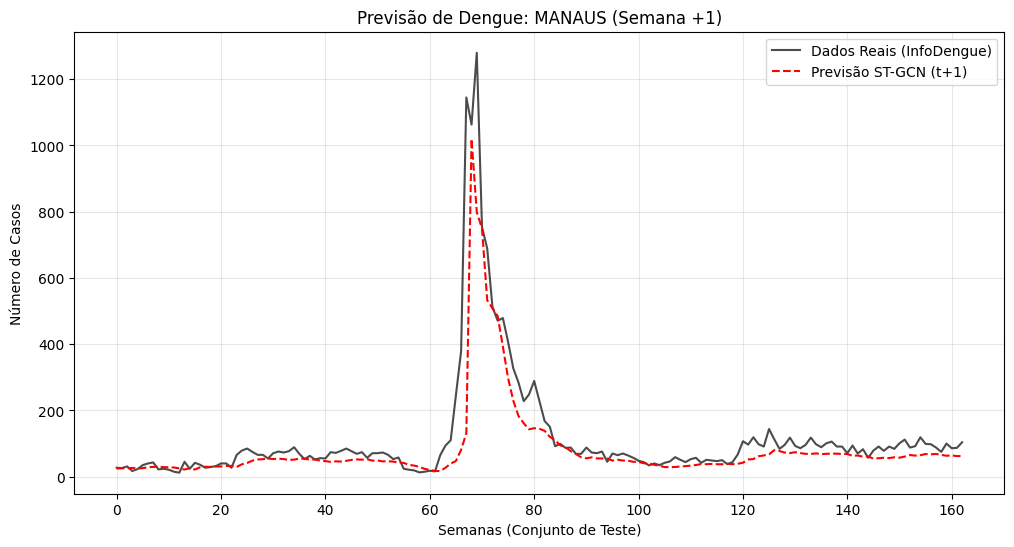


 Gráfico salvo como 'resultado_manaus_h5.png'


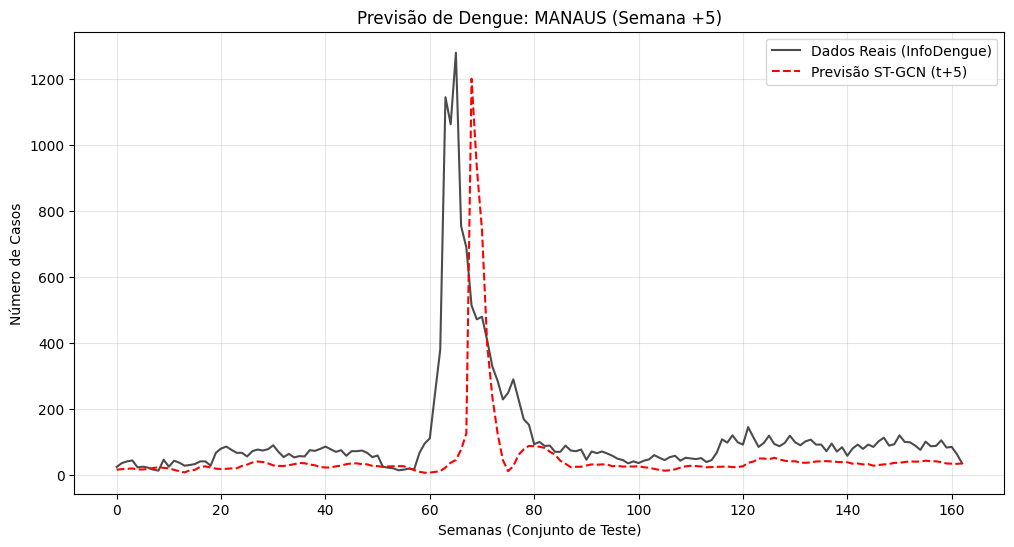

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ARQUIVO_MODELO = 'melhor_modelo_stgcn.pth'

def carregar_melhor_modelo(modelo, caminho):
    if os.path.exists(caminho):
        print(f"Carregando pesos de '{caminho}'...")
        modelo.load_state_dict(torch.load(caminho, map_location=DEVICE))
        modelo.to(DEVICE)
        modelo.eval()
        return modelo
    else:
        print(f"Erro: Arquivo '{caminho}' não encontrado.")
        return None

def avaliar_modelo(modelo, test_loader, edge_index, edge_weight, nomes_cidades):
    print("\n--- FASE 5: AVALIAÇÃO E MÉTRICAS ---")

    modelo.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.to(DEVICE)
            batch_y = batch_y.to(DEVICE)

            preds = modelo(batch_x, edge_index.to(DEVICE), edge_weight.to(DEVICE))

            all_preds.append(preds.cpu().numpy())
            all_targets.append(batch_y.cpu().numpy())

    predictions = np.concatenate(all_preds, axis=0)
    targets = np.concatenate(all_targets, axis=0)

    print(f" Previsões geradas. Shape: {predictions.shape}")

    mse_global = mean_squared_error(targets.flatten(), predictions.flatten())
    rmse_global = np.sqrt(mse_global)
    mae_global = mean_absolute_error(targets.flatten(), predictions.flatten())

    print(f"\n --- RESULTADOS GERAIS (Todas as Cidades, Todo Horizonte) ---")
    print(f"   RMSE Global: {rmse_global:.4f}")
    print(f"   MAE Global:  {mae_global:.4f}")

    print(f"\n --- DESEMPENHO POR SEMANA FUTURA ---")
    horizonte = predictions.shape[2]
    for h in range(horizonte):
        pred_h = predictions[:, :, h].flatten()
        target_h = targets[:, :, h].flatten()

        rmse_h = np.sqrt(mean_squared_error(target_h, pred_h))
        print(f"   Semana +{h+1}: RMSE = {rmse_h:.4f}")

    return predictions, targets

def plotar_cidade(predictions, targets, nomes_cidades, nome_alvo='manaus', horizonte_idx=0):
    try:
        idx = nomes_cidades.index(nome_alvo)
    except ValueError:
        print(f"Cidade '{nome_alvo}' não encontrada. Usando a primeira da lista ({nomes_cidades[0]}).")
        idx = 0
        nome_alvo = nomes_cidades[0]

    serie_real = targets[:, idx, horizonte_idx]
    serie_pred = predictions[:, idx, horizonte_idx]

    plt.figure(figsize=(12, 6))
    plt.plot(serie_real, label='Dados Reais (InfoDengue)', color='black', alpha=0.7, linewidth=1.5)
    plt.plot(serie_pred, label=f'Previsão ST-GCN (t+{horizonte_idx+1})', color='red', linestyle='--', linewidth=1.5)

    plt.title(f"Previsão de Dengue: {nome_alvo.upper()} (Semana +{horizonte_idx+1})")
    plt.xlabel("Semanas (Conjunto de Teste)")
    plt.ylabel("Número de Casos")
    plt.legend()
    plt.grid(True, alpha=0.3)

    nome_arquivo = f"resultado_{nome_alvo}_h{horizonte_idx+1}.png"
    plt.savefig(nome_arquivo)
    print(f"\n Gráfico salvo como '{nome_arquivo}'")
    plt.show()

if __name__ == "__main__":
    if 'modelo' in locals() and 'test_loader' in locals():
        modelo = carregar_melhor_modelo(modelo, ARQUIVO_MODELO)

        if modelo:
            preds, reals = avaliar_modelo(
                modelo,
                test_loader,
                edge_index,
                edge_weight,
                nomes_cidades
            )

            plotar_cidade(preds, reals, nomes_cidades, nome_alvo='manaus', horizonte_idx=0)

            plotar_cidade(preds, reals, nomes_cidades, nome_alvo='manaus', horizonte_idx=4)

    else:
        print(" Variáveis de treino não encontradas. Rode as Fases 1 a 4 primeiro.")